In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from scipy.stats import norm
from datetime import *

[*********************100%%**********************]  4 of 4 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

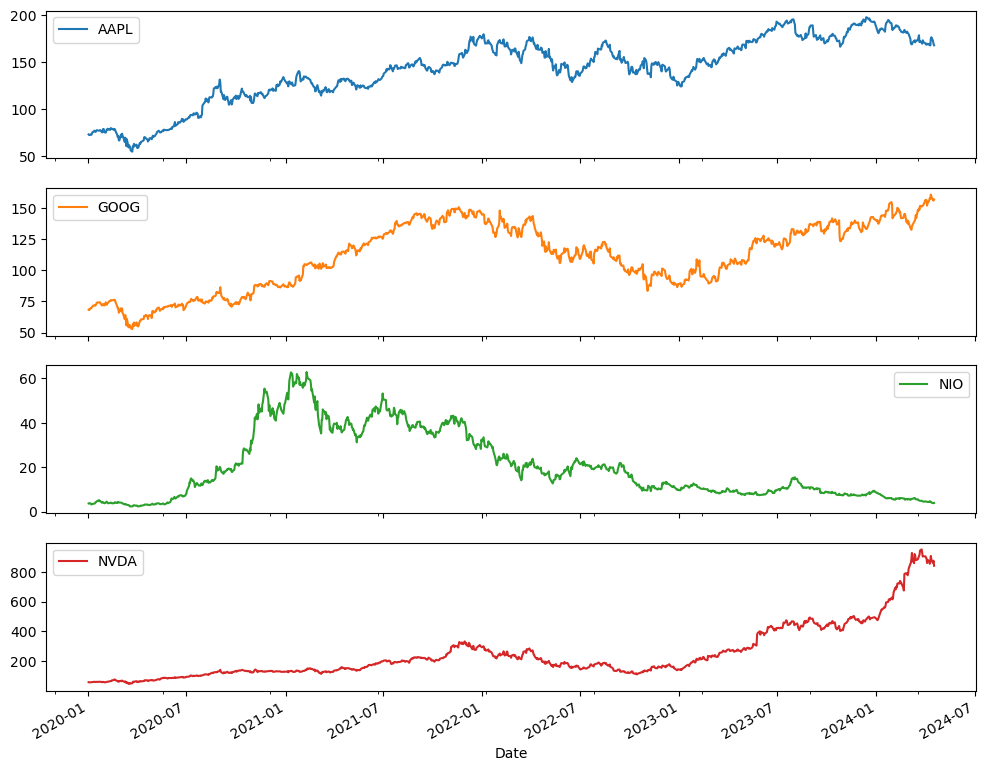

In [2]:
today_date = str(date.today())
share_names = ["AAPL", "NVDA", "GOOG", "NIO"]
df = yf.download(share_names, start = '2020-01-01', end = today_date)
df['Adj Close'].plot(subplots = True, figsize = (12, 10) )

In [31]:
def get_data(share_names, start_date = '2020-01-01', end_date = today_date):
    df = yf.download(share_names, start_date, end_date)
    data = df['Adj Close'].pct_change()
    
    covariance_matrix = data.cov()
    mean_returns = data.mean()
    
    return mean_returns, covariance_matrix

In [32]:
mean_returns, covariance_matrix = get_data(share_names)
print(mean_returns)
print(covariance_matrix)

[*********************100%%**********************]  4 of 4 completed

Ticker
AAPL    0.000987
GOOG    0.000987
NIO     0.001385
NVDA    0.003024
dtype: float64
Ticker      AAPL      GOOG       NIO      NVDA
Ticker                                        
AAPL    0.000430  0.000294  0.000369  0.000455
GOOG    0.000294  0.000434  0.000362  0.000443
NIO     0.000369  0.000362  0.002735  0.000645
NVDA    0.000455  0.000443  0.000645  0.001155


## Monte Carlo Simulation



[[10086.38757627  9804.60565099  9848.6017773  ...  9837.78023671
   9840.15108309 10111.59256171]
 [10412.97152721  9476.54507294  9919.72432148 ... 10075.3813265
  10181.9143877  10095.73288109]
 [10574.81700282  9073.22113191  9556.0913869  ... 10247.25137079
   9973.05650348  9637.42780737]
 ...
 [ 7245.2629893  10316.29477425 11052.47783859 ...  7334.31361478
  10600.52230114  8405.07639479]
 [ 7311.98334957 10274.69931585 11534.13691195 ...  7569.71359462
  10982.0630539   8379.10190457]
 [ 7544.70692854 10195.06192538 11662.54387261 ...  7350.08957064
  11018.74438405  8454.80852018]]


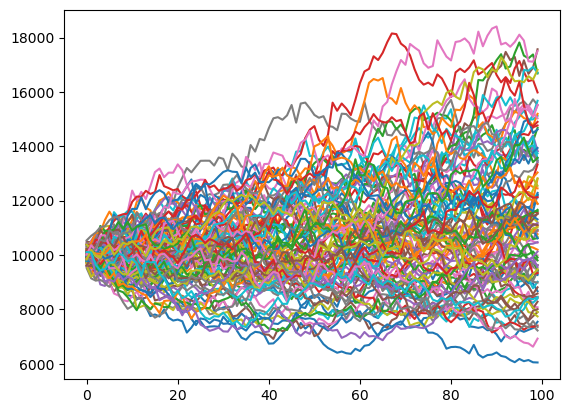

In [33]:
simulation_nb = 100
period_nb = 100
portfolio_simulations = np.full(shape=(period_nb, simulation_nb), fill_value = 0.0)
portfolio_value = 10000
mean_matrix = np.full(shape=(period_nb, len(share_names)), fill_value = mean_returns) 
mean_matrix = mean_matrix.T

for i in range(0, simulation_nb): 
    
    X = np.random.normal(size = (period_nb, len(share_names)))
    L = np.linalg.cholesky(covariance_matrix)
    
    daily_returns = mean_matrix + np.inner(L, X)
    
    portfolio_simulations[:, i]= np.cumprod(np.inner(share_weights, daily_returns.T)+1)*portfolio_value
     
print(portfolio_simulations)
plt.plot(portfolio_simulations)
plt.show()